# Задание

- Выбор датасетов:数据集的选择：
    - Студенты с **четным** порядковым номером в группе должны использовать набор данных о [жилье в Калифорнии](https://developers.google.com/machine-learning/crash-course/california-housing-data-description?hl=ru) Скачать [тут](https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv)
    - Студенты с **нечетным** порядковым номером в группе должны использовать [про обучение студентов](https://www.kaggle.com/datasets/nikhil7280/student-performance-multiple-linear-regression)
- Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).  
  获取并可视化数据集的统计数据（包括计数、平均值、标准差、最小值、最大值和各种分位数）。
- Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.  
  执行数据预处理，包括处理缺失值、分类特征编码和标准化。
- Разделите данные на обучающий и тестовый наборы данных.  
  将数据分为训练数据集和测试数据集。
- Реализуйте линейную регрессию с использованием метода наименьших квадратов без использования сторонних библиотек, кроме NumPy и Pandas. Использовать минимизацию суммы квадратов разностей между фактическими и предсказанными значениями для нахождения оптимальных коэффициентов.  
  使用最小二乘法实现线性回归，无需使用 NumPy 和 Pandas 以外的第三方库。 利用最小化实际值与预测值之差的平方和来找到最优系数。
- Постройте **три модели** с различными наборами признаков.  
  构建具有不同功能集的**三个模型**。
- Для каждой модели проведите оценку производительности, используя метрику коэффициент детерминации, чтобы измерить, насколько хорошо модель соответствует данным.  
  对于每个模型，使用确定系数指标来评估性能，以衡量模型与数据的拟合程度。
- Сравните результаты трех моделей и сделайте выводы о том, какие признаки работают лучше всего для каждой модели.  
  比较三个模型的结果并得出关于哪些功能最适合每个模型的结论。
- Бонусное задание 奖励任务
    - Ввести синтетический признак при построении модели  
      构建模型时引入综合特征

# Student Performance (Multiple Linear Regression)

The Student Performance Dataset is a dataset designed to examine the factors influencing academic student performance. The dataset consists of 10,000 student records, with each record containing information about various predictors and a performance index.  
学生表现数据集是旨在检查影响学术学生表现的因素的数据集。 该数据集由 10,000 条学生记录组成，每条记录都包含有关各种预测变量和表现指数的信息。

Variables: 变量：
- Hours Studied: The total number of hours spent studying by each student.  
  学习时数：每个学生学习所花费的总时数。
- Previous Scores: The scores obtained by students in previous tests.  
  以前的分数：学生在以前的测试中获得的分数。
- Extracurricular Activities: Whether the student participates in extracurricular activities (Yes or No).  
  课外活动：学生是否参加课外活动（是或否）。
- Sleep Hours: The average number of hours of sleep the student had per day.  
  睡眠时间：学生每天的平均睡眠时间。
- Sample Question Papers Practiced: The number of sample question papers the student practiced.  
  练习的样本试卷：学生练习的样本试卷数量。

Target Variable: 目标变量：

- Performance Index: A measure of the overall performance of each student. The performance index represents the student's academic performance and has been rounded to the nearest integer. The index ranges from 10 to 100, with higher values indicating better performance.  
  表现指数：衡量每个学生的整体表现。 成绩指数代表学生的学业成绩，并已四舍五入至最接近的整数。 该指数范围为 10 至 100，值越高表示性能越好。

The dataset aims to provide insights into the relationship between the predictor variables and the performance index. Researchers and data analysts can use this dataset to explore the impact of studying hours, previous scores, extracurricular activities, sleep hours, and sample question papers on student performance.  
该数据集旨在深入了解预测变量和绩效指数之间的关系。 研究人员和数据分析师可以使用此数据集来探索学习时间、以往成绩、课外活动、睡眠时间和样本试卷对学生表现的影响。

P.S: Please note that this dataset is synthetic and created for illustrative purposes. The relationships between the variables and the performance index may not reflect real-world scenarios  
P.S：请注意，该数据集是合成的，出于说明目的而创建。 变量和绩效指数之间的关系可能无法反映真实场景

## 1 Получите и визуализируйте статистику по датасету (включая количество, среднее значение, стандартное отклонение, минимум, максимум и различные квантили).
## 获取并可视化数据集的统计数据（包括计数、平均值、标准差、最小值、最大值和各种分位数）。

In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
# read dataset from csv file
data = pd.read_csv("./Student_Performance.csv")

In [127]:
# show top 10 rows
data.head(5)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [128]:
# show column data type and data range
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [129]:
# show info of numeric values
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


In [130]:
# show info of objective values
data.describe(include = object).T

,count,unique,top,freq
Extracurricular Activities,10000,2,No,5052


In [131]:
data['Extracurricular Activities'].value_counts()

Extracurricular Activities
No     5052
Yes    4948
Name: count, dtype: int64

## 2 Проведите предварительную обработку данных, включая обработку отсутствующих значений, кодирование категориальных признаков и нормировка.
## 执行数据预处理，包括处理缺失值、分类特征编码和标准化。

In [132]:
# check if there is missing value in each column
data.isna().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [133]:
data['Extracurricular Activities']=data['Extracurricular Activities'].replace({"No":0, "Yes":1})

In [134]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [135]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,4.9929,2.589309,1.0,3.0,5.0,7.0,9.0
Previous Scores,10000.0,69.4457,17.343152,40.0,54.0,69.0,85.0,99.0
Extracurricular Activities,10000.0,0.4948,0.499998,0.0,0.0,0.0,1.0,1.0
Sleep Hours,10000.0,6.5306,1.695863,4.0,5.0,7.0,8.0,9.0
Sample Question Papers Practiced,10000.0,4.5833,2.867348,0.0,2.0,5.0,7.0,9.0
Performance Index,10000.0,55.2248,19.212558,10.0,40.0,55.0,71.0,100.0


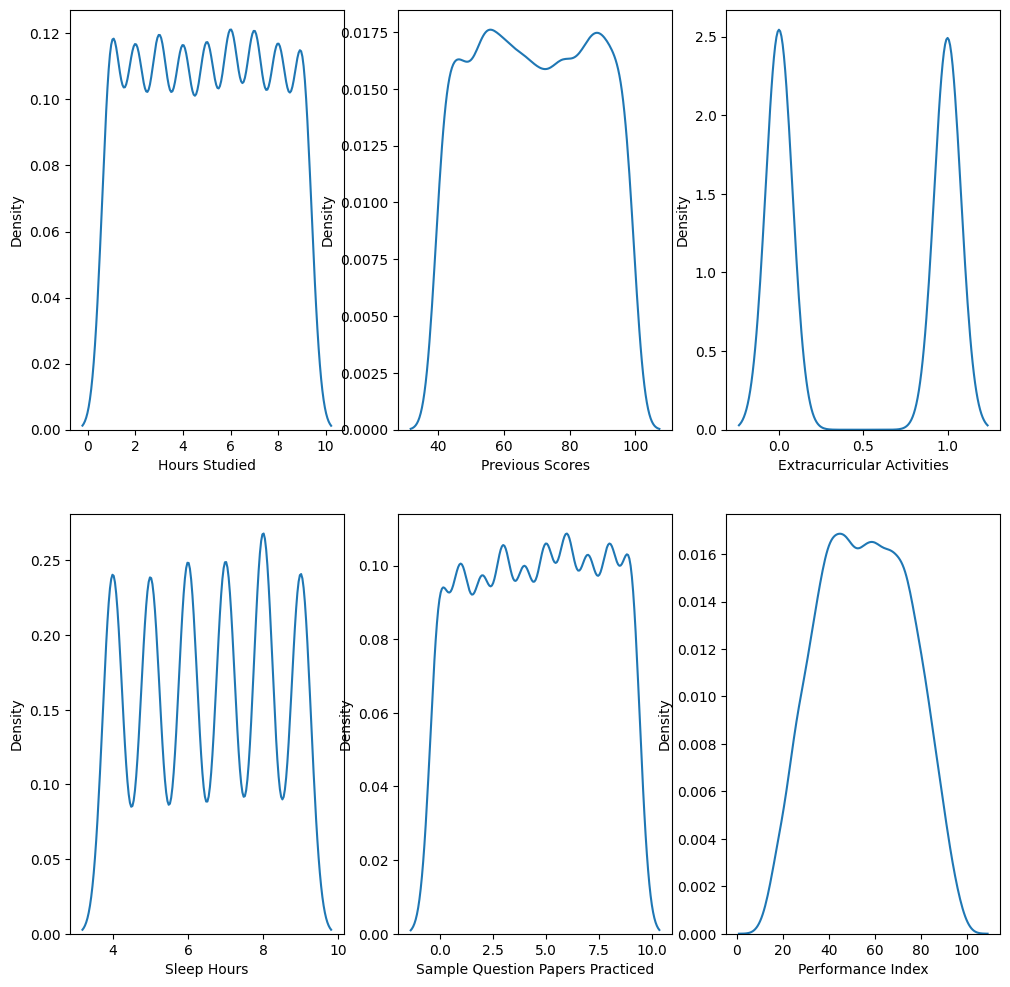

In [136]:
## Checking Normal distribution of data
plt.figure(figsize=(12,12))
i=1
for col in data.columns:
    plt.subplot(2,3,i)
    sns.kdeplot(data[col])
    i+=1

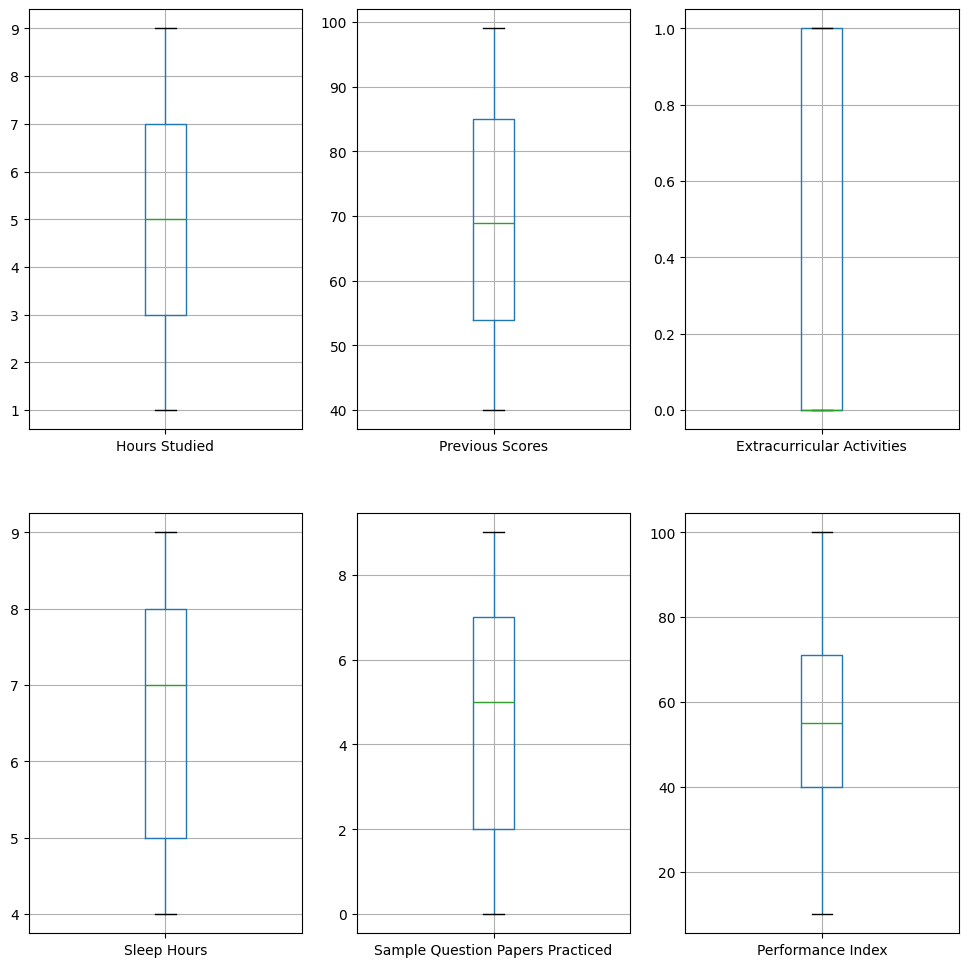

In [137]:
## Checking outliers
plt.figure(figsize=(12,12))
i=1
for col in data.columns:
    plt.subplot(2,3,i)
    data[[col]].boxplot()
    i+=1

In [138]:
data.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

<Axes: >

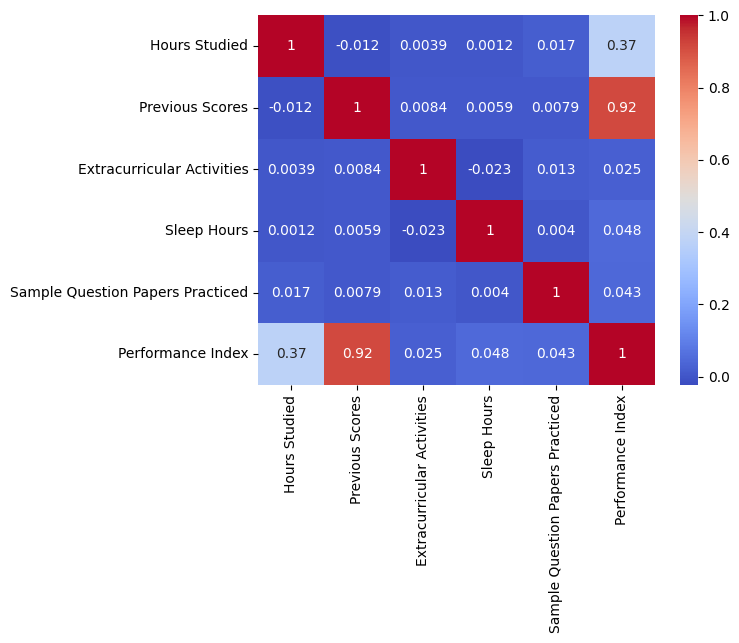

In [139]:
corellation = data.corr()
sns.heatmap(corellation,annot=True,cmap='coolwarm')

In [140]:
data_std = (data - data.mean()) / data.std()  # Z-score standardize
data_std['Performance Index'] = data['Performance Index']

In [141]:
data_std.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours Studied,10000.0,9.805490e-17,1.000000,-1.542072,-0.769665,0.002742,0.775149,1.547556
Previous Scores,10000.0,-1.247003e-16,1.000000,-1.697829,-0.890594,-0.025699,0.896855,1.704090
Extracurricular Activities,10000.0,1.776357e-17,1.000000,-0.989604,-0.989604,-0.989604,1.010404,1.010404
Sleep Hours,10000.0,1.612932e-16,1.000000,-1.492220,-0.902549,0.276791,0.866462,1.456132
Sample Question Papers Practiced,10000.0,-1.357137e-16,1.000000,-1.598446,-0.900937,0.145326,0.842835,1.540343
Performance Index,10000.0,5.522480e+01,19.212558,10.000000,40.000000,55.000000,71.000000,100.000000


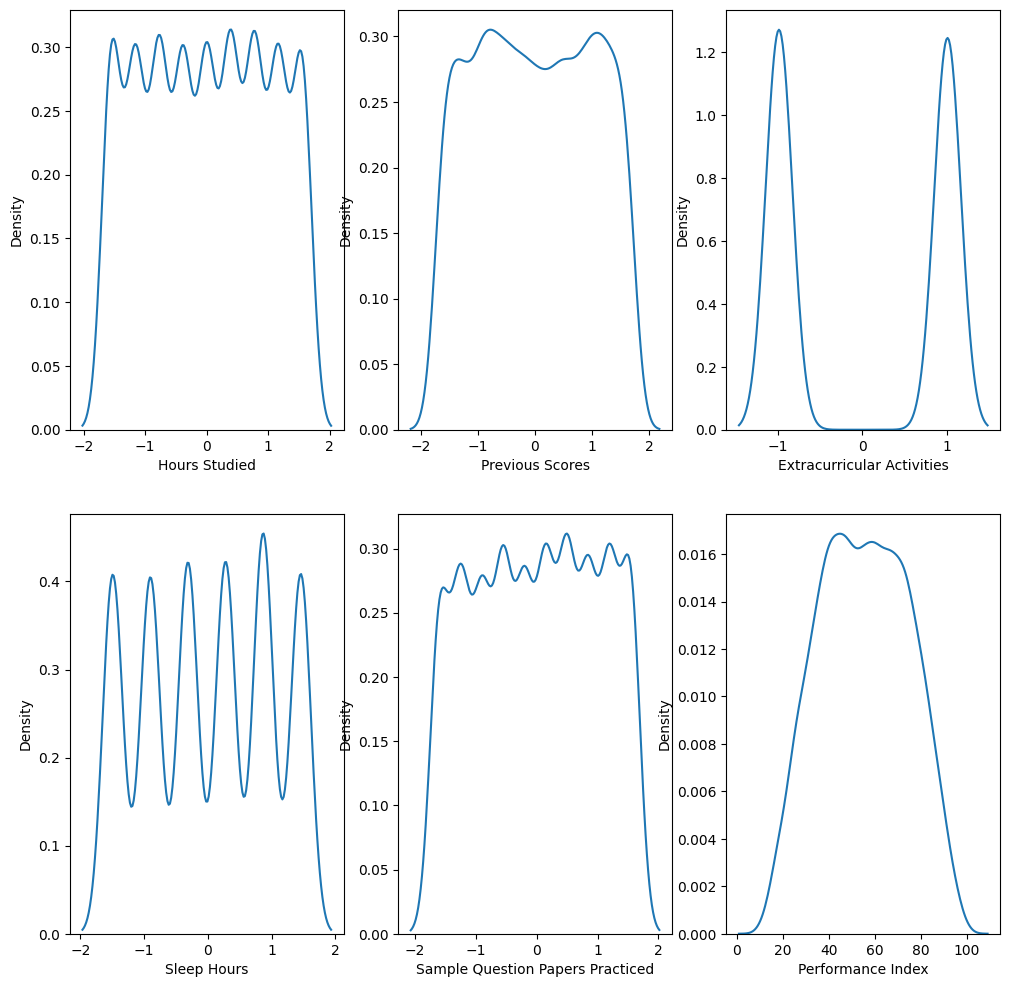

In [142]:
## Checking Normal distribution of data
plt.figure(figsize=(12,12))
i=1
for col in data.columns:
    plt.subplot(2,3,i)
    sns.kdeplot(data_std[col])
    i+=1

## 3 Разделите данные на обучающий и тестовый наборы данных.
## 将数据分为训练数据集和测试数据集。

In [143]:
from sklearn.model_selection import train_test_split
train_data, test_data =train_test_split(data_std, test_size=0.2, random_state=42)

x_train = train_data.drop('Performance Index', axis=1)
y_train = train_data['Performance Index']
x_test = test_data.drop('Performance Index', axis=1)
y_test = test_data['Performance Index']

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 5)
(2000, 5)
(8000,)
(2000,)


In [144]:
def linear_regression(X, Y):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]  # 添加偏置项
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)
    return theta

In [145]:
theta_all = linear_regression(x_train, y_train)
theta_subset = linear_regression(x_train['Previous Scores'], y_train)
theta_interactions = linear_regression(x_train['Hours Studied'], y_train)

In [146]:
from sklearn.metrics import r2_score

def evaluate_model(X, y, theta):
    X_b = np.c_[np.ones((X.shape[0], 1)), X]
    predictions = X_b.dot(theta)
    r2 = r2_score(y, predictions)
    return r2

r2_all = evaluate_model(x_test, y_test, theta_all)
r2_subset = evaluate_model(x_test['Previous Scores'], y_test, theta_subset)
r2_interactions = evaluate_model(x_test['Hours Studied'], y_test, theta_interactions)

In [147]:
print("R^2 score of module 1:", r2_all)
print("R^2 score of module 2:", r2_subset)
print("R^2 score of module 2:", r2_interactions)

R^2 score of module 1: 0.9889832909573144
R^2 score of module 2: 0.8409297694265205
R^2 score of module 2: 0.13160425385996788
